In [25]:
import pickle
import numpy as np
from math import exp,floor

In [26]:
# function used to split the dataset for testing and training
def splitDataset(data):
    checkpoint = floor(.7 * len(data))
    return [data[:checkpoint,...],data[checkpoint:,...]]

In [27]:
#function that returns the index of the maximum element in the vector
def getMax(arr):
    return  arr.argmax() 


In [28]:

def sigmoid(arr):
    dim  = arr.shape
    result = np.ones(dim)

    for i in range(dim[0]):
        for j in range(dim[1]):
            result[i][j] = 1/(1+exp(-arr[i][j]))

    return result



In [29]:
# function used to generate random values for the initial values of the neural network parameters
def generateRandom(row,col):
    arr = []

    for i in range(row):
        temp=[]
        for j in range(col):
            temp.append(0.01*(2*np.random.rand() - 1))
        arr.append(temp)
    return np.array(arr)


In [30]:
# function that generates a vector from 0 to n
def generate(i):
    result = np.arange(0,i)
    result.resize(i,1)
    return result


In [31]:
# function that checks a matrice one by one
def checkMatrices(a,b):
    length = len(a)
    for i in range(length):
        if (a[i]!=b[i]):
            return False
    return True

In [32]:
# function that returns a vector where one would have true value and rest would have false
# the index that would have the highest value would be the answer, so we would set that to one and rest to zero
def generateBinary(z):
    result = np.zeros(z.shape)
    m = getMax(z)
    result[m] = 1
    return result

In [33]:

class NeuralNetwork():

    def __init__(self,numberOfInputs,numberOfNeurons,numberOfOutputs):


        #main layers
        self.firstLayerWeights = generateRandom(numberOfNeurons,numberOfInputs)
        self.secondLayerWeights = generateRandom(numberOfNeurons,numberOfNeurons)
        self.thirdLayerWeights = generateRandom(numberOfOutputs,numberOfNeurons)
        #the biases
        self.firstLayerBias = generateRandom(numberOfNeurons,1)
        self.secondLayerBias = generateRandom(numberOfNeurons,1)
        self.thirdLayerBias = generateRandom(numberOfOutputs,1)
        #the array that would hold the value of the cost after each iteration.
        self.costArray = []        

        #learning rate
        self.alpha = 0.1


    def feedForward(self,input):
        # running the input throught the first layer
        # how the hell is 'input' working? isnt that a reserved keyword?
        firstLayerResult = np.matmul(self.firstLayerWeights,input) + self.firstLayerBias
        firstLayerResult = sigmoid(firstLayerResult)

        # running the result of the first layer through the second layer
        secondLayerResult = (np.matmul(self.secondLayerWeights,firstLayerResult)) + self.secondLayerBias
        secondLayerResult = sigmoid(secondLayerResult)

        # running through the third and final layer
        result = np.matmul(self.thirdLayerWeights,secondLayerResult)+ self.thirdLayerBias
        result = sigmoid(result)
        return result
    
    

    def train(self,input,answer):
        # running the input throught the first layer
        # how the hell is 'input' working? isnt that a reserved keyword?
        firstLayerResult = np.matmul(self.firstLayerWeights,input) + self.firstLayerBias
        firstLayerResult = sigmoid(firstLayerResult)

        # running the result of the first layer through the second layer
        secondLayerResult = (np.matmul(self.secondLayerWeights,firstLayerResult)) + self.secondLayerBias
        secondLayerResult = sigmoid(secondLayerResult)

        # running through the third and final layer
        thirdLayerResult = np.matmul(self.thirdLayerWeights,secondLayerResult)+ self.thirdLayerBias
        thirdLayerResult = sigmoid(thirdLayerResult)

        #CALCULATING THE ERRORS

        #calculating the error for the third layer
        thirdLayerError =  answer - thirdLayerResult
        temp = self.alpha*(thirdLayerResult)*(1-thirdLayerResult)*thirdLayerError
        self.thirdLayerWeights += np.matmul(temp,secondLayerResult.T)
        self.thirdLayerBias += temp


        #gradient for the second layer.
        secondLayerError = np.matmul(self.thirdLayerWeights.T,thirdLayerError)
        temp =self.alpha*secondLayerError*(secondLayerResult*(1-secondLayerResult))
        secondLayerResultGradient = np.matmul(temp,firstLayerResult.T)
        self.secondLayerWeights += secondLayerResultGradient
        self.secondLayerBias += temp

        # gradient for the first layer
        firstLayerResultError = np.matmul(self.secondLayerWeights,secondLayerError)
        temp = self.alpha * (firstLayerResultError) * firstLayerResult * (1-firstLayerResult)
        self.firstLayerWeights += np.matmul(temp,input.T)
        self.firstLayerBias += temp
        return np.sum(thirdLayerError)**2

        return np.sum(outputError**2)
    def run(self,inputs,answers):
            m = len(inputs)
            costArray = []
            for i in range(m):
                temp = inputs[i]
                dim = temp.shape

                temp.resize(dim[0],1)
                
                costArray.append((1/m)*self.train(temp,generate(10)==answers[i]))
            return costArray
    def testSet(self,inputs,answer):
        return getMax(self.feedForward(inputs))== answer

            



In [34]:
#reading the files and storing it in variables
numberOfBatchFiles = 6
metaFileName = "batches.meta"
batchFileName = "data_batch_"
allFileContents = []


for i in range(numberOfBatchFiles + 1):
    
    if (i==0):
        with open("./cifar-10-batches/batches.meta","rb") as file:
            allFileContents.append(pickle.load(file))
    else:
        fileName = batchFileName + str(i)
        with open("./cifar-10-batches/"+fileName,'rb') as file:
        
            allFileContents.append(pickle.load(file))

        
keyValuePairsForResults = allFileContents[0]['label_names']





In [35]:
numberOfPixels = 1024

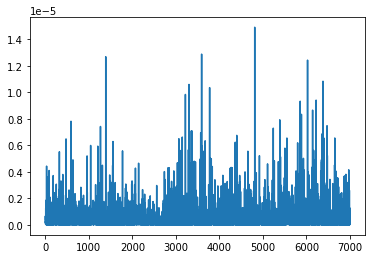

Percentage accuracy after running batch number 1  : 15.533333333333331%


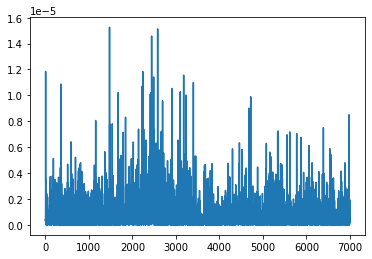

Percentage accuracy after running batch number 2  : 15.0%


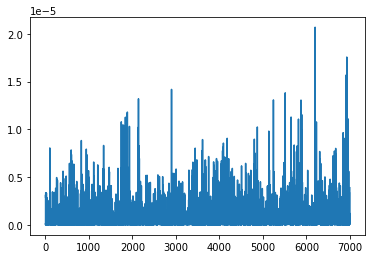

Percentage accuracy after running batch number 3  : 20.566666666666666%


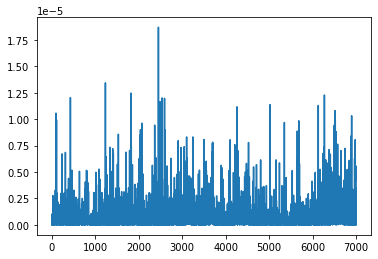

Percentage accuracy after running batch number 4  : 19.53333333333333%


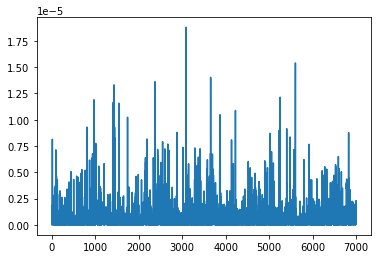

Percentage accuracy after running batch number 5  : 19.866666666666667%


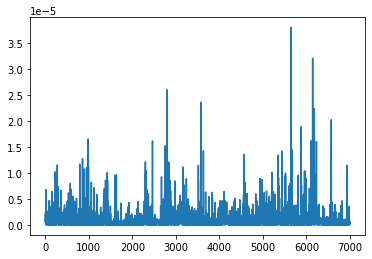

Percentage accuracy after running batch number 6  : 18.099999999999998%


In [36]:
nn = NeuralNetwork(numberOfPixels,100,10)

from matplotlib import pyplot as plot
for i in range(numberOfBatchFiles):
    temp = allFileContents[i+1]
    secondBatch = np.array(temp[b'data'])/255

    secondBatchResults=  np.array(temp[b'labels'])
    

    [secondBatchTraining,secondBatchTesting] = splitDataset(secondBatch)

    [secondBatchTrainingResults,secondBatchTestingResults] = splitDataset(secondBatchResults)
    
    testCases = len(secondBatchTesting)
#     changing the results into vectors
    secondBatchTrainingResults.resize(secondBatchTrainingResults.shape[0],1)
    secondBatchTestingResults.resize(secondBatchTestingResults.shape[0],1)
    costArray = []
    for _ in range(6):
        costArray = nn.run(secondBatchTraining,secondBatchTrainingResults)
# answer not coming near the expected value for the below code
    

    plot.plot(np.arange(7000),costArray)
    plot.show()
    counter = 0
    for _ in range(testCases):
            temp = secondBatchTesting[_]
            temp.resize(temp.shape[0],1)

            if nn.testSet(temp,secondBatchTestingResults[_]):
                counter += 1
    print(f"Percentage accuracy after running batch number {i+1}  : {(counter/testCases)*100}%")

    
    

    